# **Final Assesment **



Getting libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

getting data

In [2]:
df = pd.read_csv("/content/ML case Study.csv",header=0)
coll_tier = pd.read_csv("/content/Colleges.csv",header=0)
city = pd.read_csv("/content/cities.csv",header=0)

#Preprocessing of the Data

In [3]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
coll_tier.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [5]:
coll_tier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier 1  22 non-null     object
 1   Tier 2  28 non-null     object
 2   Tier 3  19 non-null     object
dtypes: object(3)
memory usage: 800.0+ bytes


## Combining the Datasets

In [6]:
Tier_1 = coll_tier['Tier 1'].tolist()[:22]
Tier_2 = coll_tier['Tier 2'].tolist()[:28]
Tier_3 = coll_tier['Tier 3'].tolist()[:19]

In [7]:
for item in df.College:
    if item in Tier_1:
        df['College'].replace(item,'tier1',inplace=True)
    if item in Tier_2:
        df['College'].replace(item,'tier2',inplace=True)
    if item in Tier_3:
        df['College'].replace(item,'tier3',inplace=True)

In [8]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Metrio City       9 non-null      object
 1   non-metro cities  8 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


In [9]:
metro = city['Metrio City'].tolist()[:9]
non_metro = city['non-metro cities'].tolist()[:8]

In [10]:
for item in df.City:
    if item in metro:
        df['City'].replace(item,0,inplace=True)
    if item in non_metro:
        df['City'].replace(item,1,inplace=True)

In [11]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,tier2,1,Manager,55523.0,3,66,19,71406.58
1,tier2,1,Executive,57081.0,1,84,18,68005.87
2,tier3,1,Executive,60347.0,2,52,28,76764.02
3,tier3,1,Executive,49010.0,2,81,33,82092.39
4,tier1,1,Executive,57879.0,4,74,32,73878.10


In [12]:
city.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 99.4+ KB


Looks like no missing values

## EDD

In [14]:
df.describe()

,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,0.485840,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,0.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


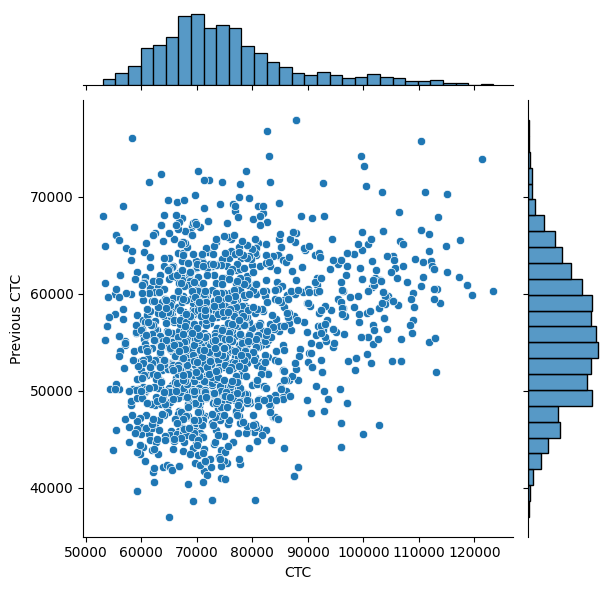

In [15]:
sns.jointplot(x='CTC', y = 'Previous CTC',data = df)

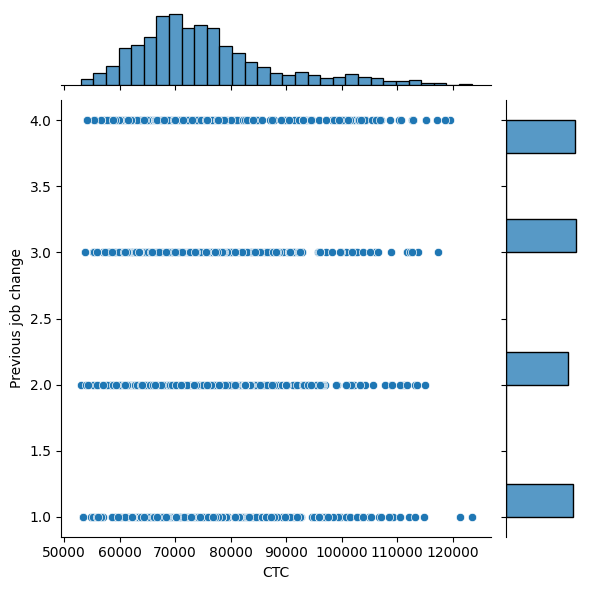

In [16]:
sns.jointplot(x='CTC', y = 'Previous job change',data = df)

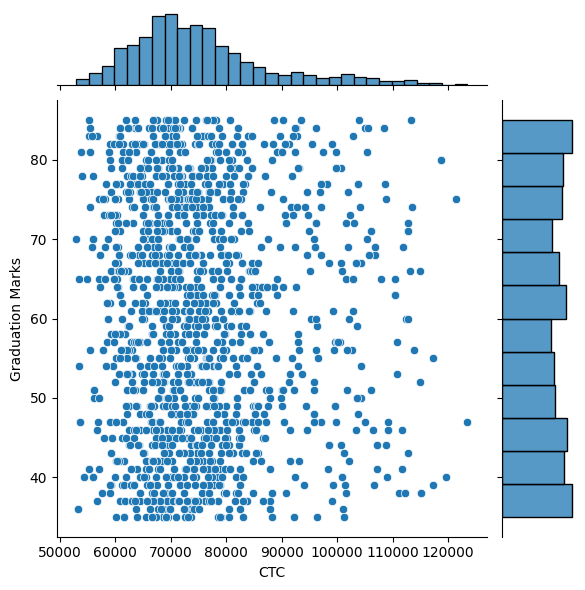

In [17]:
sns.jointplot(x='CTC', y = 'Graduation Marks',data = df)

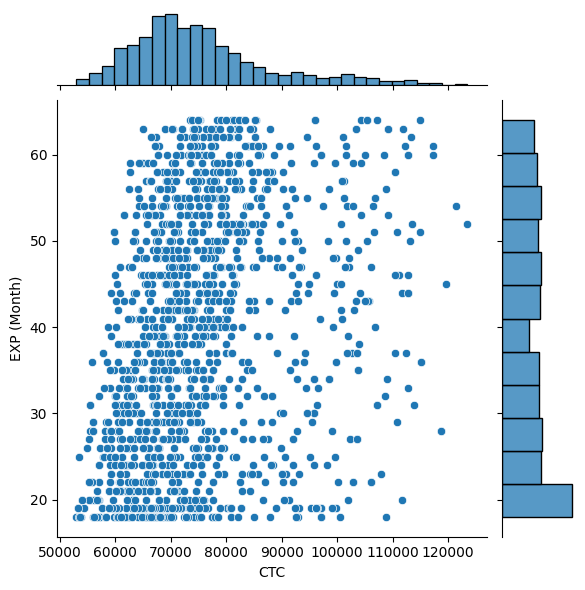

In [18]:
sns.jointplot(x='CTC', y = 'EXP (Month)',data = df)

<Axes: xlabel='College', ylabel='count'>

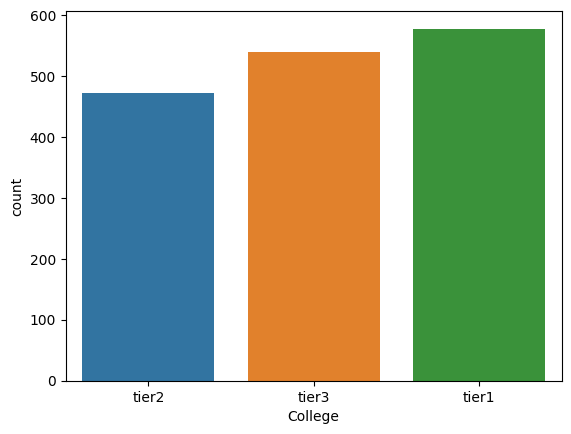

In [19]:
sns.countplot(x='College',data= df)

<Axes: xlabel='City', ylabel='count'>

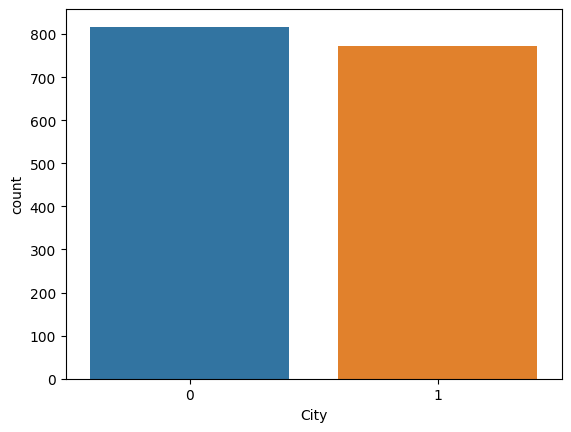

In [20]:
sns.countplot(x='City',data= df)

<Axes: xlabel='Role', ylabel='count'>

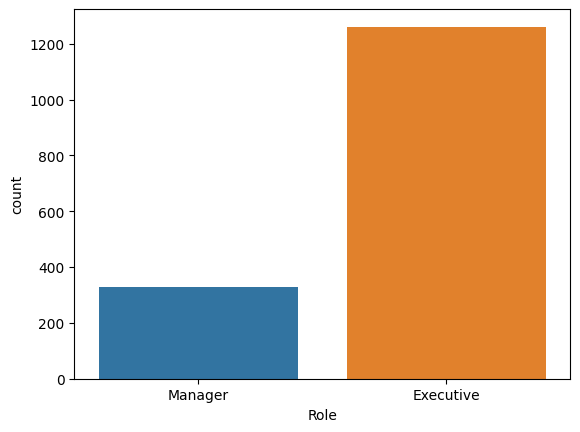

In [21]:
sns.countplot(x='Role',data= df)

In [22]:
df = pd.get_dummies(df)

In [23]:
df.head()

,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_tier1,College_tier2,College_tier3,Role_Executive,Role_Manager
0,1,55523.0,3,66,19,71406.58,0,1,0,0,1
1,1,57081.0,1,84,18,68005.87,0,1,0,1,0
2,1,60347.0,2,52,28,76764.02,0,0,1,1,0
3,1,49010.0,2,81,33,82092.39,0,0,1,1,0
4,1,57879.0,4,74,32,73878.10,1,0,0,1,0


In [24]:
del df['Role_Manager']

In [25]:
correlation = df.corr()

In [26]:
correlation

,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_tier1,College_tier2,College_tier3,Role_Executive
City,1.000000,-0.004644,-0.051670,0.018616,0.023613,0.020365,-0.002135,-0.022917,0.024288,-0.048671
Previous CTC,-0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,-0.031366,-0.010947,0.042438,-0.012321
Previous job change,-0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,0.045931,0.004271,-0.050794,0.017150
Graduation Marks,0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.005666,-0.018419,0.012021,-0.017858
EXP (Month),0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.003323,-0.014558,0.017427,0.026751
CTC,0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.019912,0.012346,-0.032149,-0.621311
College_tier1,-0.002135,-0.031366,0.045931,0.005666,-0.003323,0.019912,1.000000,-0.491510,-0.541736,-0.015158
College_tier2,-0.022917,-0.010947,0.004271,-0.018419,-0.014558,0.012346,-0.491510,1.000000,-0.465741,0.004865
College_tier3,0.024288,0.042438,-0.050794,0.012021,0.017427,-0.032149,-0.541736,-0.465741,1.000000,0.010706
Role_Executive,-0.048671,-0.012321,0.017150,-0.017858,0.026751,-0.621311,-0.015158,0.004865,0.010706,1.000000


# import necessary libraries

In [96]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.model_selection import train_test_split,validation_curve,GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import tree
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,GradientBoostingRegressor

## Spliting the Data

In [28]:
x_multi = df.drop('CTC',axis=1)
y_multi = df['CTC']
x_train,x_test,y_train,y_test = train_test_split(x_multi,y_multi,test_size=0.2,random_state=0)

#Training Models

##Linear Model

### Linear Regression

In [29]:
lrm = LinearRegression()
lrm.fit(x_train,y_train)

LinearRegression()

In [31]:
r2_score(y_train,lrm.predict(x_train))

0.5335038205027318

In [30]:
r2_score(y_test,lrm.predict(x_test))

0.5366674761766204

### preparing of Ridge and Lasso

In [32]:
scalar = preprocessing.StandardScaler().fit(x_train) 

In [33]:
x_train_s  = scalar.transform(x_train)

In [34]:
x_test_s = scalar.transform(x_test)

###Ridge

In [35]:
param_range = np.logspace(-2,8,100)

In [36]:
train_score,test_score = validation_curve(estimator=Ridge(),X=x_train_s,y=y_train,param_name="alpha",param_range=param_range,scoring ='r2')

In [37]:
train_mean = np.mean(train_score,axis=1)

In [38]:
test_mean = np.mean(test_score,axis=1)

In [39]:
max(test_mean)

0.5255042038246518

In [40]:
np.where(test_mean==max(test_mean))

(array([27]),)

In [41]:
param_range[27]

5.336699231206307

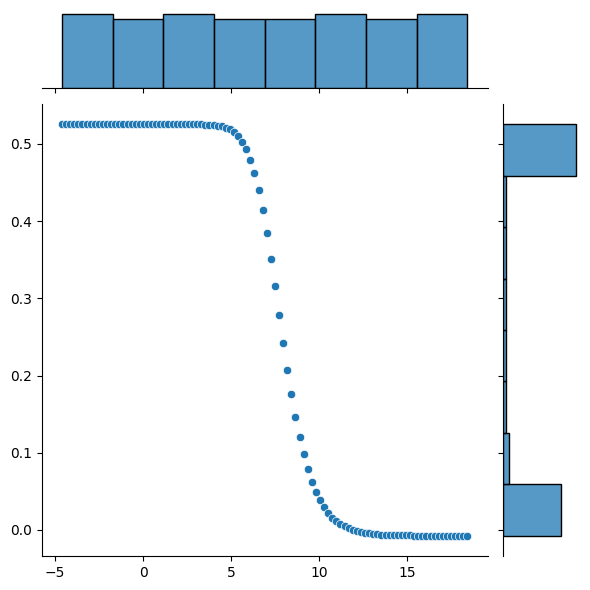

In [42]:
sns.jointplot(x=np.log(param_range),y=test_mean)

In [43]:
lm_r_best = Ridge(alpha=param_range[27])

In [44]:
lm_r_best.fit(x_train_s,y_train)

Ridge(alpha=5.336699231206307)

In [46]:
r2_score(y_train,lm_r_best.predict(x_train_s))

0.5334950361030206

In [45]:
r2_score(y_test,lm_r_best.predict(x_test_s))

0.5365159653415602

##Lasso

In [97]:
param_range = np.logspace(-2,8,100)

In [103]:
train_score,test_score = validation_curve(estimator=Lasso(),X=x_train_s,y=y_train,param_name="alpha",param_range=param_range,scoring ='r2')

In [104]:
train_mean = np.mean(train_score,axis=1)

In [105]:
test_mean = np.mean(test_score,axis=1)

In [106]:
max(test_mean)

0.5256355623227839

In [107]:
np.where(test_mean==max(test_mean))

(array([39]),)

In [108]:
param_range[39]

86.97490026177834

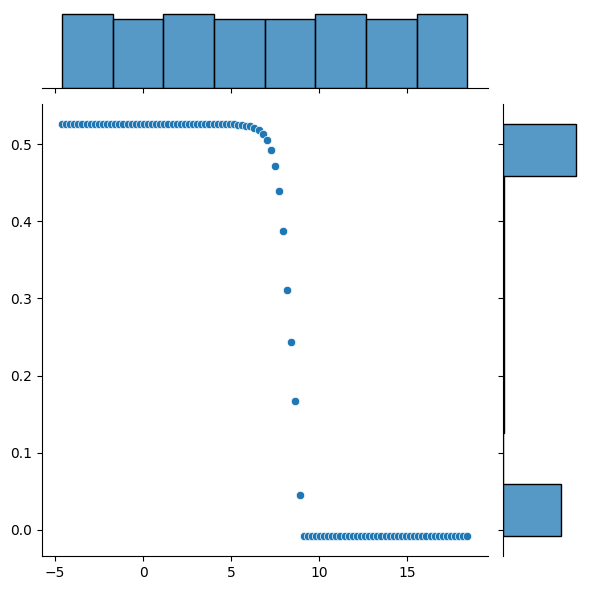

In [109]:
sns.jointplot(x=np.log(param_range),y=test_mean)

In [110]:
lm_r_best = Ridge(alpha=param_range[39])

In [111]:
lm_r_best.fit(x_train_s,y_train)

Ridge(alpha=86.97490026177834)

In [113]:
r2_score(y_train,lm_r_best.predict(x_train_s))

0.5314381052066899

In [112]:
r2_score(y_test,lm_r_best.predict(x_test_s))

0.5324961398451409

## Decision tree

In [47]:
# regretree = tree.DecisionTreeRegressor(max_depth=4)
regretree = tree.DecisionTreeRegressor()

In [48]:
regretree.fit(x_train,y_train)

DecisionTreeRegressor()

In [49]:
y_train_pred = regretree.predict(x_train)
y_test_pred = regretree.predict(x_test)

In [50]:
mean_squared_error(y_test,y_test_pred)

99801582.73743711

In [51]:
r2_score(y_train,y_train_pred)

1.0

In [52]:
r2_score(y_test,y_test_pred)

0.3274119454242548

## Bagging Classifier

In [53]:
bag = BaggingRegressor(base_estimator=regretree,n_estimators=1000,
                        bootstrap=True,n_jobs=-1,random_state = 42)


In [54]:
bag.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=1000,
                 n_jobs=-1, random_state=42)

In [55]:
y_train_pred = bag.predict(x_train)
y_test_pred = bag.predict(x_test)

In [56]:
mean_squared_error(y_test,y_test_pred)

50802216.17354207

In [57]:
r2_score(y_train,y_train_pred)

0.9500288461826385

In [58]:
r2_score(y_test,y_test_pred)

0.6576310434455483

## Random forest

In [59]:
rf = RandomForestRegressor(n_estimators=1000,n_jobs=-1,random_state=42)

In [60]:
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [61]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [62]:
mean_squared_error(y_test,y_test_pred)

50994949.61767761

In [63]:
r2_score(y_train,y_train_pred)

0.9501412879103168

In [64]:
r2_score(y_test,y_test_pred)

0.6563321641223232

### Fine tuning the model with Hyper parameters

In [65]:
params_grid = {"max_features": [4,5,6,7,8,9,10],
               "min_samples_split":[2,3,10]}

In [66]:
grid_search = GridSearchCV(rf,params_grid,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')

In [67]:
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='neg_mean_squared_error')

In [68]:
grid_search.best_params_

{'max_features': 5, 'min_samples_split': 2}

In [69]:
best_rf = grid_search.best_estimator_

In [70]:
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

In [71]:
mean_squared_error(y_test,y_test_pred)

50472155.79009371

In [72]:
r2_score(y_test,y_test_pred)

0.6598554036721801

## Boosting

In [86]:
gbc = GradientBoostingRegressor(learning_rate = 0.02,n_estimators=1000,max_depth=5,)


In [87]:
gbc.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=5, n_estimators=1000)

In [88]:
y_train_pred = gbc.predict(x_train)
y_test_pred = gbc.predict(x_test)

In [89]:
mean_squared_error(y_test,y_test_pred)

53928979.03695529

In [90]:
r2_score(y_test,y_test_pred)

0.6365589993582765

### Fine tuning the model with Hyper parameters

In [ ]:
gbc = GradientBoostingRegressor()

In [78]:
params_grid = {"n_estimators": [500,750,1000],
               "learning_rate": [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1],
               "max_depth":[1,2,3,4,5]
               }

In [79]:
grid_search = GridSearchCV(gbc,params_grid,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')

In [80]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.07, 0.08, 0.09, 0.1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [500, 750, 1000]},
             scoring='neg_mean_squared_error')

In [81]:
grid_search.best_params_

{'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 750}

In [82]:
best_rf = grid_search.best_estimator_

In [83]:
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

In [84]:
mean_squared_error(y_test,y_test_pred)

56411263.974740624

In [85]:
r2_score(y_test,y_test_pred)

0.6198302546689256

# Summary

1. Your views about the problem statement?

The company requires statistical data like MSE,Hypothesis testing (p value) along with the 
predicting the salary(CTC) so the direction is good,but deciding salary based on college may not be the best case as everyone have  have minimum 18 months experience . More features would have been better like department they are/will be working in. So we can get more accurate things (CTC) that company need with regression Models.


---


2. What will be your approach to solving this task?

Using the best Linear Model to get the required Statistical Data based on MSE and r2 score.And decision tree for predicting the CTC
For this preprocessing of the data is required


*   combing the Datasets into one
*   Preprocessing the dataset
*   Divding the dataset into training and Testing
*   Training different models on this dataset and fine tuning the models with hyper parameters
*   Finding the best models and getting more details of that models

---

3. What ML model options did you have available to perform this task?

As I have discussed before all regression models can be used in this case. After Preprocessing it is clear that visibly there is no linear correlation but Since we needed statistical data we have used 
*   Linear_regresssion model(OLS)
*   Ridge
*   Lasso

In the case of Decision tree we have used 
*   regressionDecision 
*   Bagging
*   Random forest
*   Boosting

---

4. Which model’s performance is best and what could be the possible reason for that?

It is Randomforest as Decision tree are better than linear_regression models and since Randomforest is an ensemble technique it is better than a simple DecisionTree.

Boosting reduces the bias so when comming to test data it is reducingits performance you can clearly see this as after hyper tuning we are getting higher mse for test dataset compared to randomly choosen data set. thats the reason why we are not going for adaboosting and all

Below are the results for testing Dataset

RandomForest {'max_features': 5, 'min_samples_split': 2,
n_estimators:1000}

*   MSE = 50472155.79
*   r2 value = 0.6598554036721801



Liner_models: Linear regression
* r2 value = 0.5366674761766204


---

5. What steps can you take to improve this selected model’s performance even further?

We can further tune this model by trying out different hyper parameters(maximum number of features ,number of estimators,maximum depth of the trees).
Train on more higher data.
Evaluate the model with a variety of metrics.






# Statistic

In [117]:
import statsmodels.api as sn
# this is the reason we didnt remove the college tier_3 column to get its statistic 

In [116]:
x_multi.head()

,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),College_tier1,College_tier2,College_tier3,Role_Executive
0,1,55523.0,3,66,19,0,1,0,0
1,1,57081.0,1,84,18,0,1,0,1
2,1,60347.0,2,52,28,0,0,1,1
3,1,49010.0,2,81,33,0,0,1,1
4,1,57879.0,4,74,32,1,0,0,1


In [118]:
x_multi_cons = sn.add_constant(x_multi)

In [119]:
x_multi_cons.head()

,const,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),College_tier1,College_tier2,College_tier3,Role_Executive
0,1.0,1,55523.0,3,66,19,0,1,0,0
1,1.0,1,57081.0,1,84,18,0,1,0,1
2,1.0,1,60347.0,2,52,28,0,0,1,1
3,1.0,1,49010.0,2,81,33,0,0,1,1
4,1.0,1,57879.0,4,74,32,1,0,0,1


In [120]:
lmr_stat= sn.OLS(y_multi,x_multi_cons).fit()

In [121]:
lmr_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     227.1
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          3.36e-256
Time:                        04:19:28   Log-Likelihood:                -16647.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1580   BIC:                         3.336e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.297e+04   1642.824     26.154      0.000    3.97e+04    4.62e+04
City                 -368.3233    433.465     -0.850      0.396   -1218.550     481.903
Previous CTC            0.4105      0.033     12.542      0.000       0.346       0.475
Previous job change   125.3208    192.846      0.650      0.516    -252.941     503.582
Graduation Marks        6.6007     14.501      0.455      0.649     -21.843      35.044
EXP (Month)           261.6302     15.458     16.925      0.000     231.309     291.951
College_tier1         1.46e+04    618.313     23.620      0.000    1.34e+04    1.58e+04
College_tier2        1.473e+04    628.296     23.451      0.000    1.35e+04     1.6e+04
College_tier3        1.363e+04    636.517     21.410      0.000    1.24e+04    1.49e+04
Role_Executive      -1.949e+04    534.578    -36.458      0.000   -2.05e+04   -1.84e+04
==============================================================================
Omnibus:                       48.290   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.258
Skew:                           0.405   Prob(JB):                     2.72e-12
Kurtosis:                       3.384   Cond. No.                     8.87e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.32e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Hypothesis testing (Statistically we are sure that this features will affect our model by it value per unit)

const,previous_ctc,college_tier,Role_executibe are the most important feature

# Model

In [122]:
rf = RandomForestRegressor(n_estimators=1000,max_features=5, min_samples_split= 2,n_jobs=-1,random_state=42)

In [123]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_features=5, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [ ]:
rf.predict('your input values')